In [34]:
import numpy as np
from casadi import *

def casadi_controller(cur_state, ref):
    Q = 1*np.eye(2)
    q = 1.5
    R = np.eye(2)
    cur_ref = ref[0]
    error_x = 1 * (cur_state[0] - cur_ref[0])
    error_y = 1 * (cur_state[1] - cur_ref[1])
    error_theta = -cur_ref[2] + cur_state[2]
    error_theta = (error_theta + np.pi) % (2 * np.pi) - np.pi
    opti = casadi.Opti()

    U = opti.variable(2, 2)
    E2 = opti.variable(3,1)
    E3 = opti.variable(3,1)
    E1 = opti.variable(3,1)
    error = opti.parameter(3,1)
    gamma = 1
    v = U[0,:]
    w = U[1,:]
    obj = E3.T @ E3 + gamma * (E1[:2].T@ Q @ E1[:2] + q*(1 - cos(E1[2]))**2 + U[:,0].T @R @ U[:,0]) + gamma**(2) *(E2[:2].T @Q @  E2[:2] + q*(1 - cos(E2[2]))**2 + U[:,1].T @ R@  U[:,1])
    opti.minimize(obj)
    opti.subject_to(opti.bounded(0, U[0,:], 1))
    opti.subject_to(opti.bounded(-1, U[1,:], 1))

    opti.subject_to(E1 == error)

    opti.subject_to(E2 == E1 + vertcat(hcat([0.5 * cos(E1[2] + ref[0][2]), 0]), hcat([0.5 * sin(E1[2] + ref[0][2]), 0]), 
                                       hcat([0, 0.5])) @ U[:,0] + vcat([ref[0][0] - ref[1][0], 
                                                                     ref[0][1] - ref[1][1], 
                                                                     (ref[0][2] - ref[1][2] + np.pi) % (2 * np.pi) - np.pi]))

    opti.subject_to(E3 == E2 + vertcat(hcat([0.5*cos(E2[2] + ref[1][2]), 0]), hcat([0.5*sin(E2[2] + ref[1][2]), 0]),
                                       hcat([0, 0.5])) @ U[:,1] + vcat([ref[1][0] - ref[2][0], 
                                                                     ref[1][1] - ref[2][1], 
                                                                     (ref[1][2] - ref[2][2]+ np.pi) % (2 * np.pi) - np.pi]))

    

    
    opti.set_value(error, vcat([error_x, error_y, error_theta]))
    print(opti)
    opts = {'ipopt.print_level': 0, 'print_time': 0, 'ipopt.sb': 'yes'}
    opti.solver('ipopt', opts)
    sol = opti.solve()
    return sol.value(U)[:,0]


Opti {
  instance #3361
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.33219869 -0.0080033 ]
0
0.01826024055480957
Opti {
  instance #3362
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.4313784  0.00567615]
1
0.01566600799560547
Opti {
  instance #3363
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.47981608 0.01934481]
2
0.01333165168762207
Opti {
  instance #3364
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.49728776 0.03852392]
3
0.012830018997192383
Opti {
  instance #3365
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.46630428 0.06882532]
4
0.01198577880859375
Opti {
  instance #3366
  #variables: 4 (nx = 1

[v,w] [0.73591337 0.14992838]
54
0.012503385543823242
Opti {
  instance #3416
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.66296657 0.19541403]
55
0.012596845626831055
Opti {
  instance #3417
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.56706198 0.38324226]
56
0.011994600296020508
Opti {
  instance #3418
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.49935525 0.66617874]
57
0.012202024459838867
Opti {
  instance #3419
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.51120862 0.88319144]
58
0.01334071159362793
Opti {
  instance #3420
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.51146829 0.77970682]
59
0.012450

[v,w] [0.42550755 0.44429843]
111
0.012378454208374023
Opti {
  instance #3473
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.48886476 0.34558416]
112
0.012001514434814453
Opti {
  instance #3474
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.5971743  0.27693812]
113
0.012008428573608398
Opti {
  instance #3475
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.66616226 0.23326516]
114
0.01224517822265625
Opti {
  instance #3476
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.7563115  0.19494089]
115
0.012492895126342773
Opti {
  instance #3477
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [0.83735434 0.16304412]
116
0.

[v,w] [0.75312778 0.03836402]
169
0.01228189468383789
Opti {
  instance #3531
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.7001265  -0.00975322]
170
0.012189865112304688
Opti {
  instance #3532
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.64466666 -0.07816488]
171
0.011931896209716797
Opti {
  instance #3533
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.53985055 -0.18912026]
172
0.011902570724487305
Opti {
  instance #3534
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.42893142 -0.35478064]
173
0.01138925552368164
Opti {
  instance #3535
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.26844335 -0.5352027

[v,w] [ 0.0628064  -0.50349153]
227
0.012207746505737305
Opti {
  instance #3589
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.1277315  -0.40807913]
228
0.012278556823730469
Opti {
  instance #3590
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.28677477 -0.33180926]
229
0.011768579483032227
Opti {
  instance #3591
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.41957124 -0.27467545]
230
0.011762142181396484
Opti {
  instance #3592
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.52845031 -0.23445496]
231
0.011571884155273438
Opti {
  instance #3593
  #variables: 4 (nx = 13)
  #parameters: 1 (np = 3)
  #constraints: 5 (ng = 13)
  CasADi solver needs updating.
}
[v,w] [ 0.57621162 -0.196

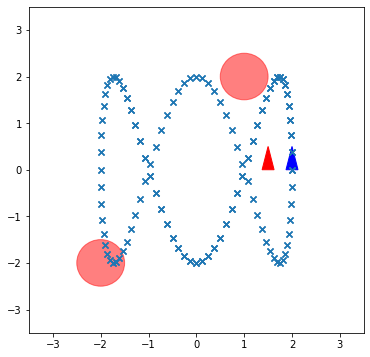

MovieWriter ffmpeg unavailable; using Pillow instead.


In [35]:
from time import time
import numpy as np
from utils import visualize
# Simulation params
np.random.seed(10)
time_step = 0.5 # time between steps in seconds
sim_time = 120    # simulation time

# Car params
x_init = 1.5
y_init = 0.0
theta_init = np.pi/2
v_max = 1
v_min = 0
w_max = 1
w_min = -1

# This function returns the reference point at time step k
def lissajous(k):
    xref_start = 0
    yref_start = 0
    A = 2
    B = 2
    a = 2*np.pi/50
    b = 3*a
    T = np.round(2*np.pi/(a*time_step))
    k = k % T
    delta = np.pi/2
    xref = xref_start + A*np.sin(a*k*time_step + delta)
    yref = yref_start + B*np.sin(b*k*time_step)
    v = [A*a*np.cos(a*k*time_step + delta), B*b*np.cos(b*k*time_step)]
    thetaref = np.arctan2(v[1], v[0])
    return [xref, yref, thetaref]

# This function implements a simple P controller
def simple_controller(cur_state, ref_state):
    k_v = 0.55
    k_w = 1.0
    v = k_v*np.sqrt((cur_state[0] - ref_state[0])**2 + (cur_state[1] - ref_state[1])**2)
    v = np.clip(v, v_min, v_max)
    angle_diff = ref_state[2] - cur_state[2]
    angle_diff = (angle_diff + np.pi) % (2 * np.pi ) - np.pi
    w = k_w*angle_diff
    w = np.clip(w, w_min, w_max)
    return [v,w]

# This function implement the car dynamics
def car_next_state(time_step, cur_state, control, noise = True):
    theta = cur_state[2]
    rot_3d_z = np.array([[np.cos(theta), 0], [np.sin(theta), 0], [0, 1]])
    f = rot_3d_z @ control
    mu, sigma = 0, 0.04 # mean and standard deviation for (x,y)
    w_xy = np.random.normal(mu, sigma, 2)
    mu, sigma = 0, 0.004  # mean and standard deviation for theta
    w_theta = np.random.normal(mu, sigma, 1)
    w = np.concatenate((w_xy, w_theta))
    if noise:
        return cur_state + time_step*f.flatten() + w
    else:
        return cur_state + time_step*f.flatten()

# Obstacles in the environment
obstacles = np.array([[-2,-2,0.5], [1,2,0.5]])
# Params
traj = lissajous
ref_traj = []
error = 0.0
car_states = []
times = []
# Start main loop
main_loop = time()  # return time in sec
# Initialize state
cur_state = np.array([x_init, y_init, theta_init])
cur_iter = 0
# Main loop
while (cur_iter * time_step < sim_time):
    t1 = time()
    # Get reference state
    cur_time = cur_iter*time_step
    # cur_ref = traj(cur_iter)
    cur_ref = []
    for i in range(120):
        cur_ref.append(traj(cur_iter + i))
    # Save current state and reference state for visualization
    ref_traj.append(cur_ref[0])
    car_states.append(cur_state)

    ################################################################
    # Generate control input
    # TODO: Replace this simple controller with your own controller
    # control = simple_controller(cur_state, cur_ref)
    control = casadi_controller(cur_state, cur_ref)
    v = control[0]
    w = control[1]
    v = np.clip(v, v_min, v_max)
    w = np.clip(w,w_min, w_max)
    print("[v,w]", control)
    ################################################################

    # Apply control input
    next_state = car_next_state(time_step, cur_state, control, noise=True)
    # Update current state
    cur_state = next_state
    # Loop time
    t2 = time()
    print(cur_iter)
    print(t2-t1)
    times.append(t2-t1)
    error = error + np.linalg.norm(cur_state - cur_ref)
    cur_iter = cur_iter + 1

main_loop_time = time()
print('\n\n')
print('Total time: ', main_loop_time - main_loop)
print('Average iteration time: ', np.array(times).mean() * 1000, 'ms')
print('Final error: ', error)

# Visualization
ref_traj = np.array(ref_traj)
car_states = np.array(car_states)
times = np.array(times)
visualize(car_states, ref_traj, obstacles, times, time_step, save=True)



In [ ]:
opti = casadi.Opti()
N = 10
U = opti.variable(2,N)
E1 = opti.parameter(3,1)
E = opti.variable(3,N)
v = U[0,:]
w = U[1,:]
opti.subject_to(opti.bounded(0,v,1))
opti.subject_to(opti.bounded(-1,w,1))
opti.set_value(E1, 0)

obj = 0
gamma = 0.95
#For loop to set objective function
for i in range(N):
    if i == 0:
        obj += (E1[:2].T @ E1[:2] + (1 - cos(E1[2]))**2 + U[:,0].T @ U[:,0])
    else:
        obj += gamma**(i)*(E[:2,i-1].T @ E[:2,i-1] + (1 - cos(E[2,i-1]))**2 + U[:,i].T @ U[:,i])
obj += E[:,-1].T @ E[:,-1]

opti.subject_to(E[:,0] == E1 + vertcat(hcat([cos(E1[2]), 0]), hcat([sin(E1[2]), 0]), hcat([0, 1])) @ U[:,0])

for i in range(1,N):
    opti.subject_to(E[:,i] == E[:,i-1] + 
                    vertcat(hcat([cos(E[2, i-1]), 0]), hcat([sin(E[2,i-1]), 0]), hcat([0, 1])) @ U[:,i-1])

opti.minimize(obj)
opts = {'ipopt.print_level': 0, 'print_time': 0, 'ipopt.sb': 'yes'}
opti.solver('ipopt', opts)
sol = opti.solve()

In [ ]:
sol.value(U)

In [ ]:
sol.value(E)